___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from customer of a food delivery company.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will specify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

***Features:***
- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- ***Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise*** 
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- The First Look

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering with numeric features

    * Create a new dataset with numeric features
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Clustering based on selected features

    * Create a new dataset with variables of your choice*
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering with selected features

    * Determine optimal number of clusters using Dendogram*

    * Apply Agglomerative Clustering*

    * Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

### Import Libraries

In [625]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.metrics import silhouette_score

from ipywidgets import interact
import warnings

warnings.filterwarnings("ignore")

pd.options.display.float_format = (
    lambda x: "{:.0f}".format(x) if int(x) == x else "{:,.2f}".format(x)
)
plt.rc('figure', figsize=(20, 10))

### Load Dataset

In [626]:
df0=pd.read_csv('marketing_campaign.csv',sep=';')
df0.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138,46344,71613,26646,58293
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,2012-09-04,2014-03-08,2013-08-21,2014-02-10,2014-01-19
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


In [627]:
df0.shape

(2240, 29)

### The First Look
- Since we will do clustering analysis, we will remove Response variable from dataset.
- You can rename columns to more usable, if you need.

In [628]:
from skimpy import clean_columns
df0 = clean_columns(df0)
df0.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp_3', 'accepted_cmp_4', 'accepted_cmp_5', 'accepted_cmp_1',
       'accepted_cmp_2', 'complain', 'z_cost_contact', 'z_revenue',
       'response'],
      dtype='object')

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.

In [629]:
df0['response'].value_counts(dropna=False) #label

response
0    1906
1     334
Name: count, dtype: int64

In [630]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2240 non-null   int64  
 1   year_birth             2240 non-null   int64  
 2   education              2240 non-null   object 
 3   marital_status         2240 non-null   object 
 4   income                 2216 non-null   float64
 5   kidhome                2240 non-null   int64  
 6   teenhome               2240 non-null   int64  
 7   dt_customer            2240 non-null   object 
 8   recency                2240 non-null   int64  
 9   mnt_wines              2240 non-null   int64  
 10  mnt_fruits             2240 non-null   int64  
 11  mnt_meat_products      2240 non-null   int64  
 12  mnt_fish_products      2240 non-null   int64  
 13  mnt_sweet_products     2240 non-null   int64  
 14  mnt_gold_prods         2240 non-null   int64  
 15  num_

In [631]:
df0.duplicated().any().sum()

0

In [632]:
df=df0.copy()

In [633]:
df['dt_customer'].value_counts(dropna=False)

dt_customer
2012-08-31    12
2012-09-12    11
2013-02-14    11
2014-05-12    11
2013-08-20    10
              ..
2012-08-05     1
2012-11-18     1
2013-05-25     1
2013-04-14     1
2014-01-09     1
Name: count, Length: 663, dtype: int64

In [634]:
df['dt_customer'].nunique()

663

In [635]:
df['dt_customer']=pd.to_datetime(df['dt_customer'])

In [636]:
df['dt_customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: dt_customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


In [637]:
df['loyalty']=df['dt_customer'].max()-df['dt_customer']

In [638]:
df['loyalty'].value_counts()

loyalty
667 days    12
655 days    11
500 days    11
48 days     11
313 days    10
            ..
693 days     1
588 days     1
400 days     1
441 days     1
171 days     1
Name: count, Length: 663, dtype: int64

In [639]:
df["loyalty"]=(df["dt_customer"].max()-df["dt_customer"]).dt.days
df["loyalty"]

0       663
1       113
2       312
3       139
4       161
       ... 
2235    381
2236     19
2237    155
2238    156
2239    622
Name: loyalty, Length: 2240, dtype: int64

In [640]:
df['income'].value_counts(dropna=False)

income
NaN      24
7500     12
35860     4
37760     3
83844     3
         ..
40760     1
41452     1
6835      1
33622     1
52869     1
Name: count, Length: 1975, dtype: int64

In [641]:
df.dropna(inplace=True)

In [642]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2216 non-null   int64         
 1   year_birth             2216 non-null   int64         
 2   education              2216 non-null   object        
 3   marital_status         2216 non-null   object        
 4   income                 2216 non-null   float64       
 5   kidhome                2216 non-null   int64         
 6   teenhome               2216 non-null   int64         
 7   dt_customer            2216 non-null   datetime64[ns]
 8   recency                2216 non-null   int64         
 9   mnt_wines              2216 non-null   int64         
 10  mnt_fruits             2216 non-null   int64         
 11  mnt_meat_products      2216 non-null   int64         
 12  mnt_fish_products      2216 non-null   int64         
 13  mnt_swee

In [643]:
df['age']=2014-df['year_birth']

In [644]:
df['education'].value_counts(dropna=False)

education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [645]:
df['education']=df['education'].map({'Graduation':'Graduate','PhD':'Postgraduate', 'Master':'Postgraduate', '2n Cycle':'Postgraduate', 'Basic': 'Undergraduate'})

In [646]:
df['education'].value_counts(dropna=False)

education
Graduate         1116
Postgraduate     1046
Undergraduate      54
Name: count, dtype: int64

In [647]:
df['education']=df['education'].map({'Graduate':1, 'Postgraduate':2, 'Undergraduate':0})

In [648]:
df['marital_status'].value_counts(dropna=False)

marital_status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [649]:
df['marital_status'] = df['marital_status'].apply(lambda x: 2 if x in ['Married', 'Together'] else 1 )

In [650]:
df['marital_status'].value_counts(dropna=False)

marital_status
2    1430
1     786
Name: count, dtype: int64

In [651]:
df['children']=df['kidhome']+ df['teenhome']

In [652]:
df['family_size']=df['marital_status']+df['children']

In [653]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp_3', 'accepted_cmp_4', 'accepted_cmp_5', 'accepted_cmp_1',
       'accepted_cmp_2', 'complain', 'z_cost_contact', 'z_revenue', 'response',
       'loyalty', 'age', 'children', 'family_size'],
      dtype='object')

In [654]:
df['z_cost_contact'].value_counts(dropna=False) #tüm degerler ayni oldugu icin drop ediyoruz. 

z_cost_contact
3    2216
Name: count, dtype: int64

In [655]:
df['z_revenue'].value_counts(dropna=False)


z_revenue
11    2216
Name: count, dtype: int64

In [656]:
df['foodspent']= df['mnt_wines']+ df['mnt_fruits']+ df['mnt_meat_products']+ df['mnt_fish_products']+ df['mnt_sweet_products']

In [657]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp_3', 'accepted_cmp_4', 'accepted_cmp_5', 'accepted_cmp_1',
       'accepted_cmp_2', 'complain', 'z_cost_contact', 'z_revenue', 'response',
       'loyalty', 'age', 'children', 'family_size', 'foodspent'],
      dtype='object')

In [658]:
df.drop(columns=['id','year_birth','marital_status', 'kidhome', 'teenhome','dt_customer','mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products','children','education', 'recency',
       'z_cost_contact','z_revenue'], axis=0, inplace=True)

In [659]:
df.drop(columns=['accepted_cmp_1', 'accepted_cmp_2', 'accepted_cmp_3','accepted_cmp_4', 'accepted_cmp_5', 'complain'], axis=0, inplace=True)
# PCA kullanacagimiz icin binary olanlari siliyoruz.

In [660]:
df.head()

,income,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,response,loyalty,age,family_size,foodspent
0,58138,88,3,8,10,4,7,1,663,57,1,1529
1,46344,6,2,1,1,2,5,0,113,60,3,21
2,71613,42,1,8,2,10,4,0,312,49,2,734
3,26646,5,2,2,0,4,6,0,139,30,3,48
4,58293,15,5,5,3,6,5,0,161,33,3,407


In [661]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
income,2216,"52,247.25","25,173.08",1730,35303,"51,381.50",68522,666666
mnt_gold_prods,2216,43.97,51.82,0,9,24.50,56,321
num_deals_purchases,2216,2.32,1.92,0,1,2,3,15
num_web_purchases,2216,4.09,2.74,0,2,4,6,27
num_catalog_purchases,2216,2.67,2.93,0,0,2,4,28
num_store_purchases,2216,5.80,3.25,0,3,5,8,13
num_web_visits_month,2216,5.32,2.43,0,3,6,7,20
response,2216,0.15,0.36,0,0,0,0,1
loyalty,2216,353.52,202.43,0,180,355.50,529,699
age,2216,45.18,11.99,18,37,44,55,121


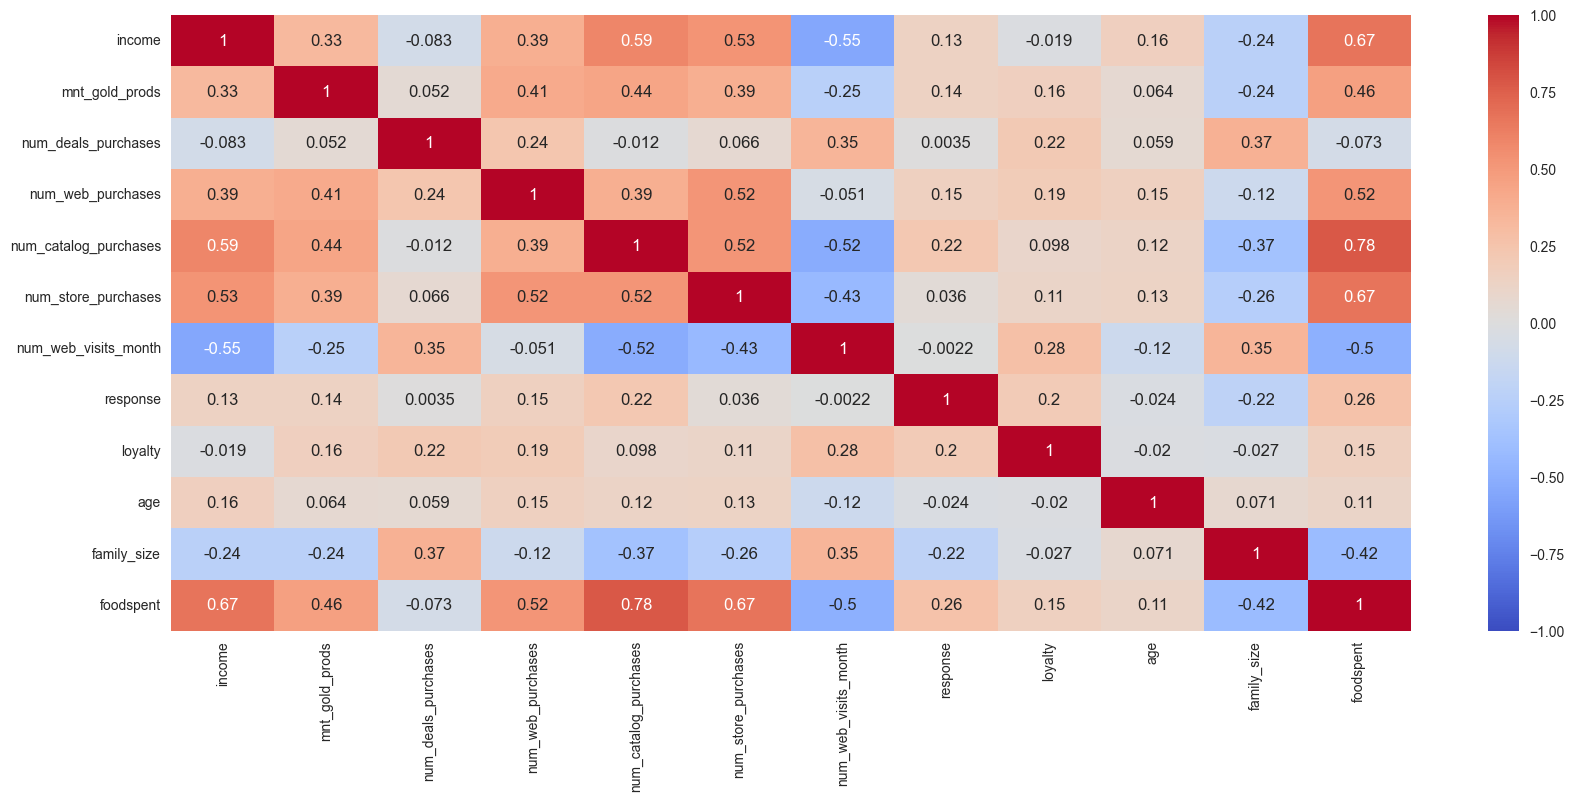

In [662]:
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='coolwarm');

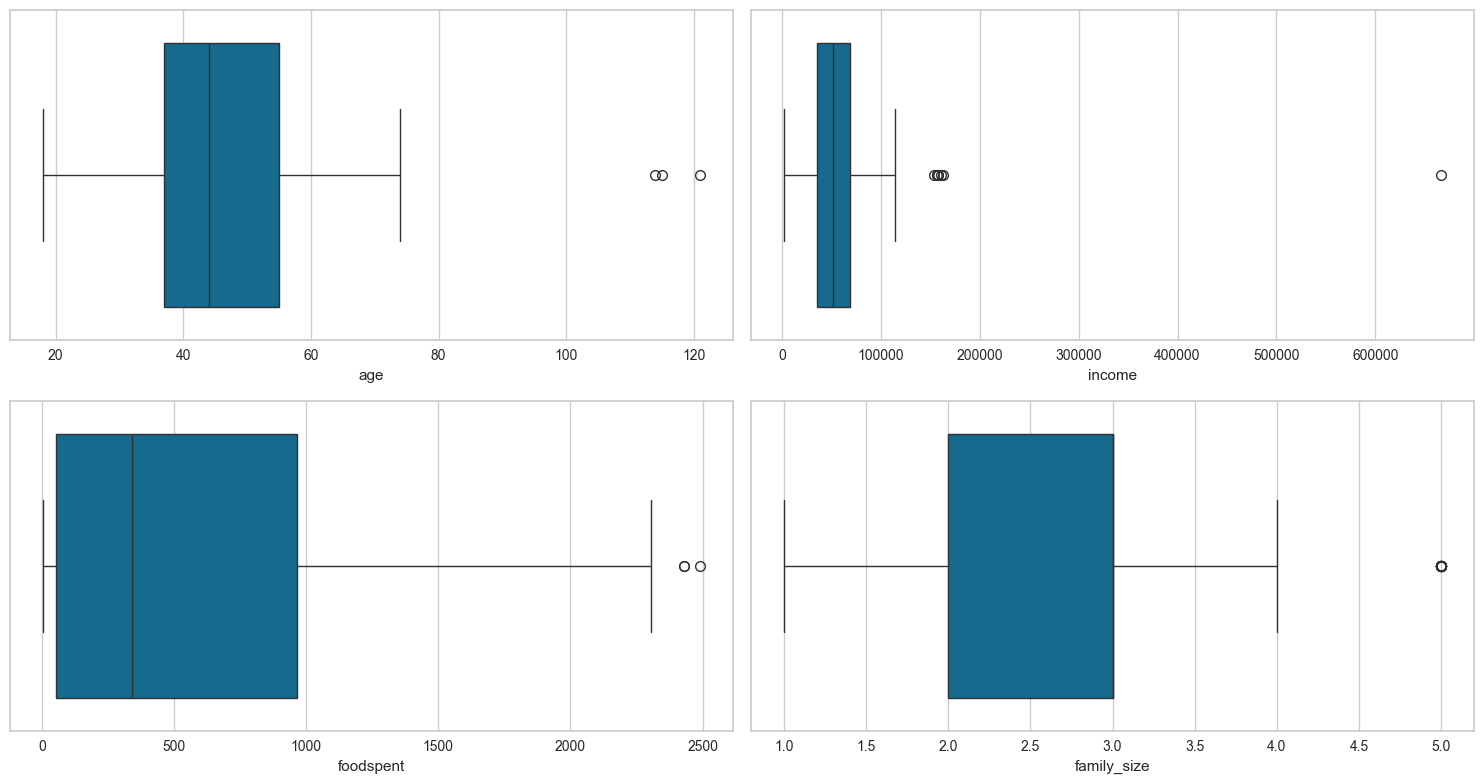

In [663]:
fig, ax=plt.subplots(2,2, figsize=(15,8))
sns.boxplot(data=df, x='age', ax=ax[0,0])
sns.boxplot(data=df, x='income', ax=ax[0,1])
sns.boxplot(data=df, x='foodspent', ax=ax[1,0])
sns.boxplot(data=df, x='family_size', ax=ax[1,1])

plt.tight_layout();

In [664]:
df=df[(df['age']<100) & (df['income']<600000)]

In [665]:
df.shape

(2212, 12)

In [666]:
df.reset_index(drop=True, inplace=True)

In [667]:
label=df['response']

In [668]:
df1=df.drop(columns=['response'], axis=0)

In [669]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income                 2212 non-null   float64
 1   mnt_gold_prods         2212 non-null   int64  
 2   num_deals_purchases    2212 non-null   int64  
 3   num_web_purchases      2212 non-null   int64  
 4   num_catalog_purchases  2212 non-null   int64  
 5   num_store_purchases    2212 non-null   int64  
 6   num_web_visits_month   2212 non-null   int64  
 7   loyalty                2212 non-null   int64  
 8   age                    2212 non-null   int64  
 9   family_size            2212 non-null   int64  
 10  foodspent              2212 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 190.2 KB


### PCA
- We have too many features for bivariate analysis and pairplot. So we will create 3 components to have insight how our data distrubuted. 

In [670]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)

In [671]:
df_scaled = pd.DataFrame(df_scaled, columns=df1.columns)
df_scaled.head()

,income,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,loyalty,age,family_size,foodspent
0,0.29,0.85,0.35,1.43,2.50,-0.56,0.69,1.53,1.02,-1.76,1.67
1,-0.26,-0.73,-0.17,-1.13,-0.57,-1.17,-0.13,-1.19,1.27,0.45,-0.94
2,0.91,-0.04,-0.69,1.43,-0.23,1.29,-0.54,-0.21,0.33,-0.65,0.30
3,-1.18,-0.75,-0.17,-0.76,-0.91,-0.56,0.28,-1.06,-1.29,0.45,-0.89
4,0.29,-0.56,1.39,0.33,0.11,0.06,-0.13,-0.95,-1.03,0.45,-0.27


In [672]:
df_scaled.shape

(2212, 11)

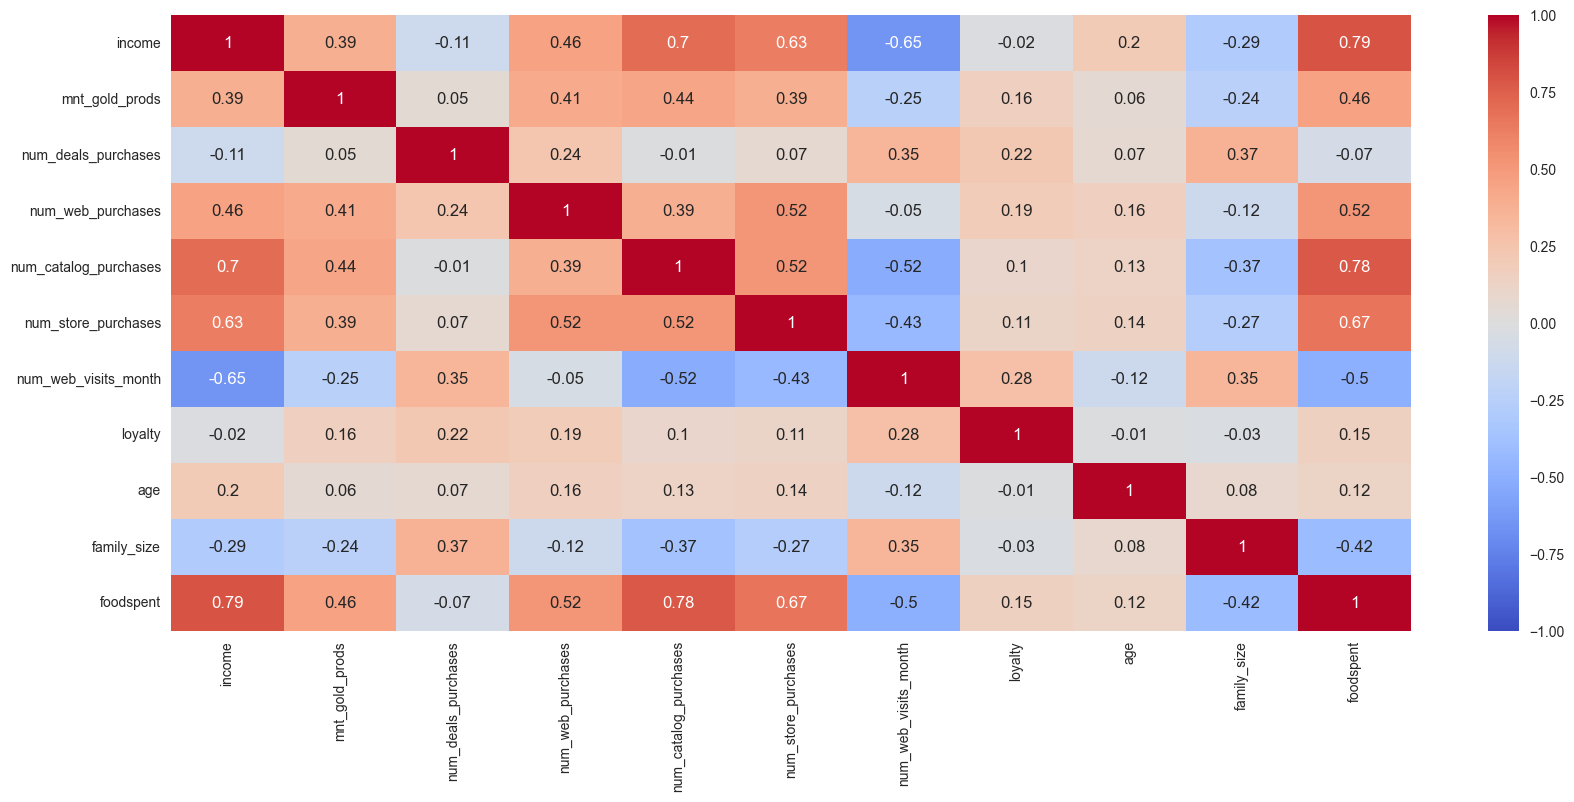

In [673]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_scaled.corr().round(2), vmin=-1, vmax=1, annot=True, cmap="coolwarm");

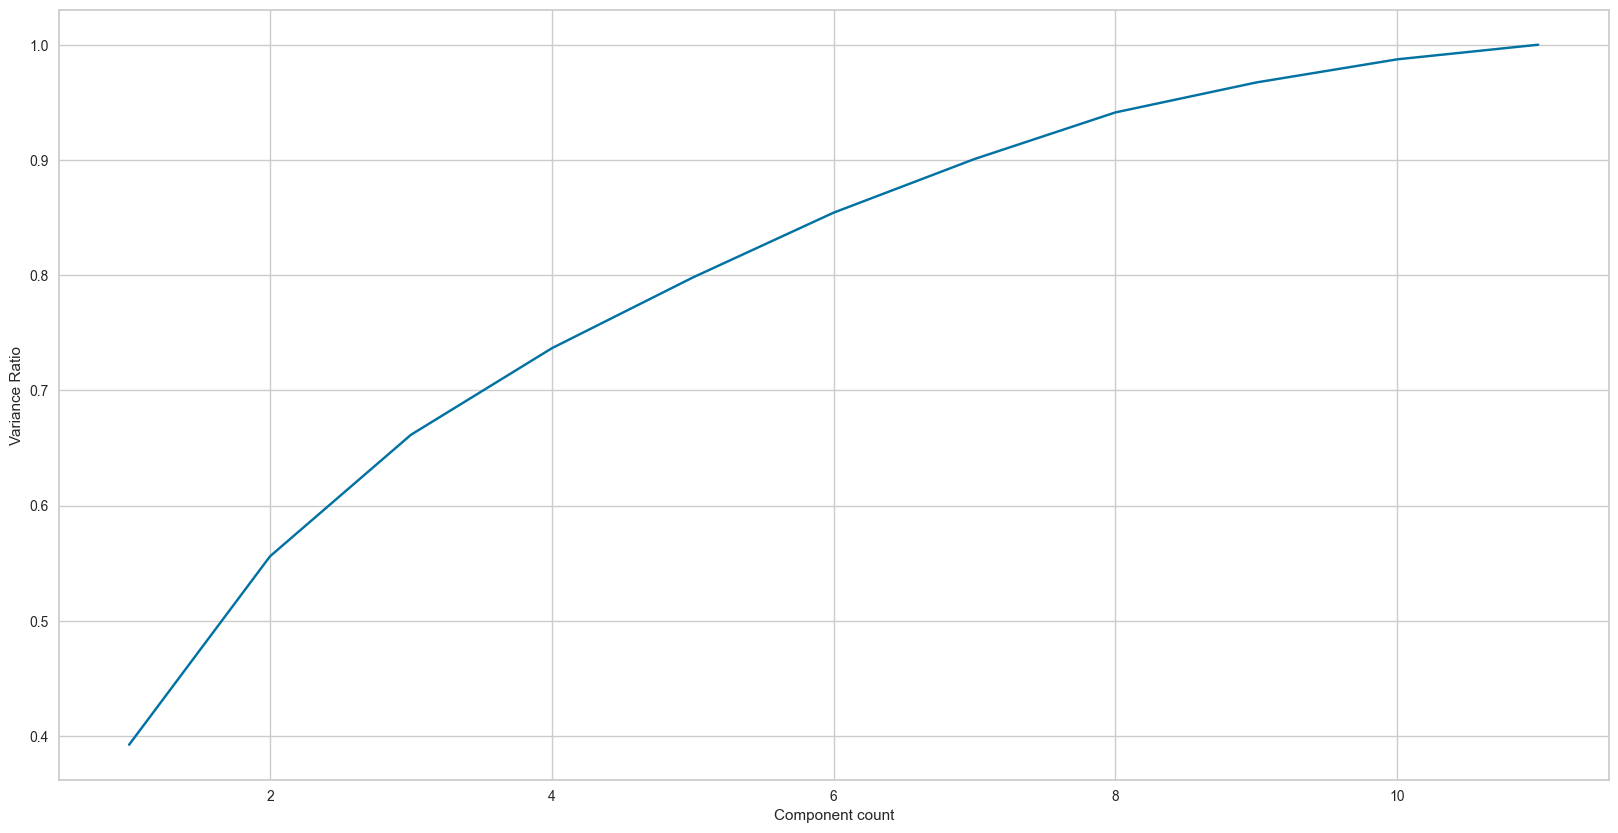

In [674]:
x = range(1,12)
pca = PCA().fit(df_scaled)
plt.plot(x, pca.explained_variance_ratio_.cumsum())
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

In [675]:
my_dict = {"explained_variance": pca.explained_variance_,
           "explained_variance_ratio": pca.explained_variance_ratio_,
           "cumsum_explained_variance_ratio": pca.explained_variance_ratio_.cumsum()}

In [676]:
df_ev = pd.DataFrame(my_dict, index=range(1,12))
df_ev

,explained_variance,explained_variance_ratio,cumsum_explained_variance_ratio
1,4.32,0.39,0.39
2,1.80,0.16,0.56
3,1.16,0.11,0.66
4,0.83,0.08,0.74
5,0.68,0.06,0.80
6,0.62,0.06,0.85
7,0.51,0.05,0.90
8,0.45,0.04,0.94
9,0.29,0.03,0.97
10,0.22,0.02,0.99


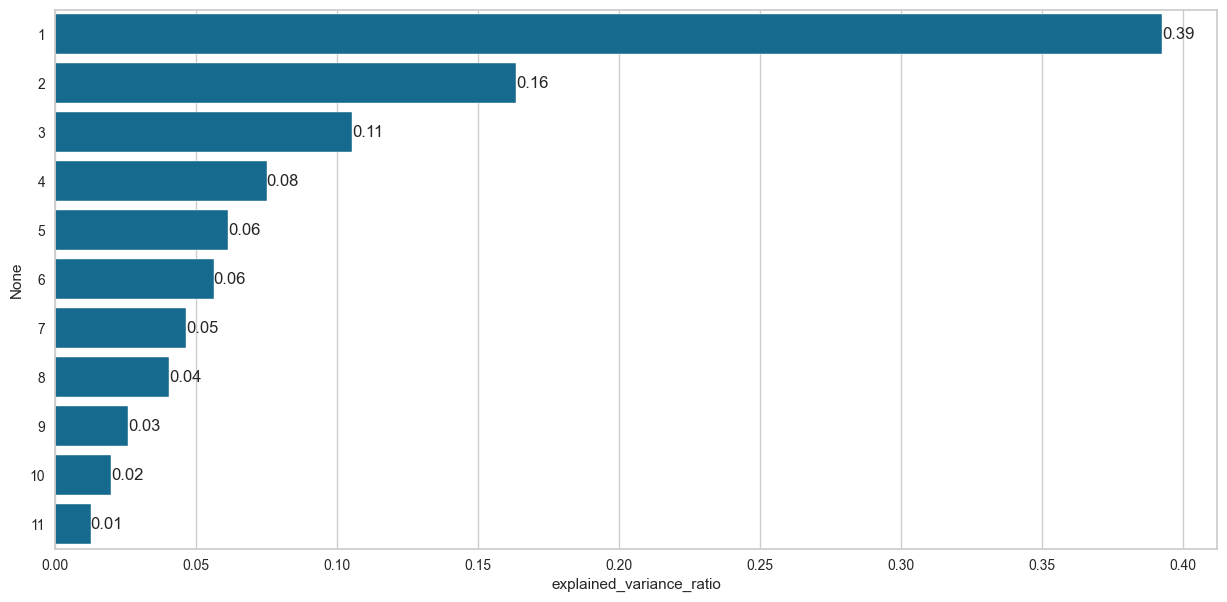

In [677]:
plt.figure(figsize=(15, 7))

ax = sns.barplot(y=df_ev.index,
                 x=df_ev.explained_variance_ratio,
                orient='horizontal')
ax.bar_label(ax.containers[0], fmt="%.2f");

In [678]:
pca = PCA(n_components=3).fit(df_scaled)

In [679]:
pca.explained_variance_

array([4.31891003, 1.79957708, 1.16066023])

In [680]:
pca.explained_variance_ratio_

array([0.39245069, 0.16352396, 0.10546687])

In [681]:
pca.explained_variance_ratio_.cumsum()

array([0.39245069, 0.55597464, 0.66144151])

In [682]:
principal_components = pca.fit_transform(df_scaled)
principal_components

array([[ 2.6408238 ,  1.41365107, -1.21980985],
       [-1.70414832, -1.12060034,  1.66147116],
       [ 1.67936156, -0.21060824,  0.25968589],
       ...,
       [ 1.35451478, -1.42702467, -1.07099107],
       [ 1.86555505, -0.2043688 ,  1.67339539],
       [-1.38992784,  1.34687617,  0.95512272]])

In [683]:
component_df = pd.DataFrame(data=principal_components,
                           columns=["first_component", "second_component", "third_component"])
component_df

,first_component,second_component,third_component
0,2.64,1.41,-1.22
1,-1.70,-1.12,1.66
2,1.68,-0.21,0.26
3,-2.25,-0.91,-0.26
4,-0.26,0.38,0.44
...,...,...,...
2207,2.02,1.36,-0.44
2208,-0.68,2.35,3.83
2209,1.35,-1.43,-1.07
2210,1.87,-0.20,1.67


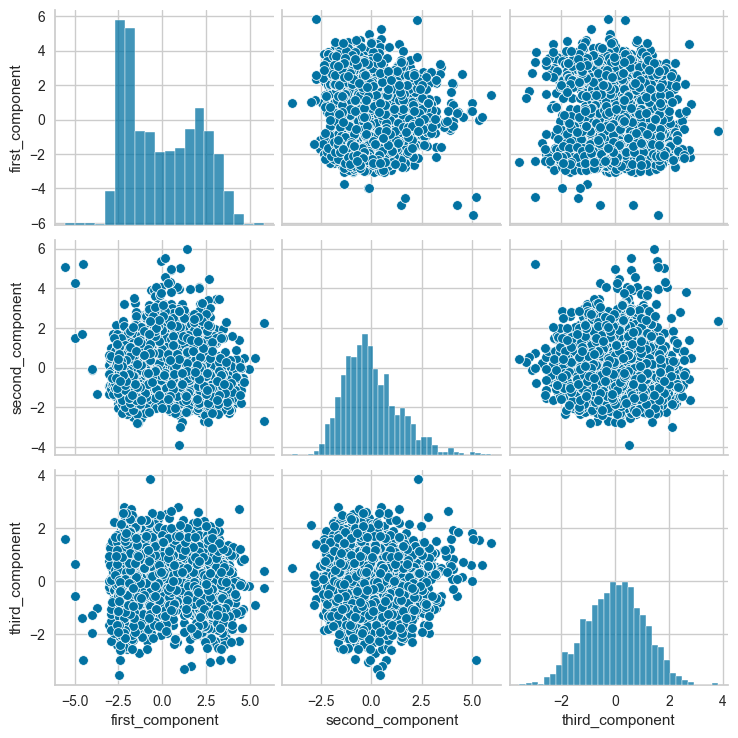

In [684]:
sns.pairplot(component_df);

In [685]:
pca_argmax = np.argmax(component_df.to_numpy(), axis=1)
pca_argmax

array([0, 2, 0, ..., 0, 0, 1])

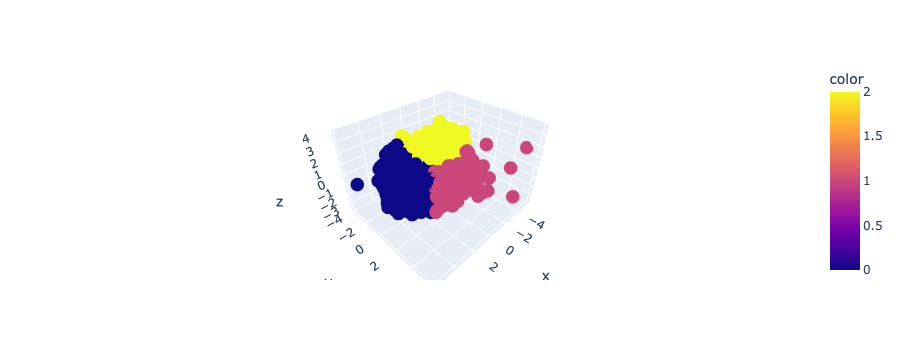

In [686]:
import plotly.express as px
fig = px.scatter_3d(x=component_df["first_component"], 
                    y=component_df["second_component"], 
                    z=component_df["third_component"], 
                    color=pca_argmax)
fig.show();

# 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.

The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of purchases and Income
- **Spender Customers** --  Income is less but purcheses high, so can also be treated as potential target customer.

## K-means Clustering

### Create a new dataset with numeric features

In [687]:
df_scaled

,income,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,loyalty,age,family_size,foodspent
0,0.29,0.85,0.35,1.43,2.50,-0.56,0.69,1.53,1.02,-1.76,1.67
1,-0.26,-0.73,-0.17,-1.13,-0.57,-1.17,-0.13,-1.19,1.27,0.45,-0.94
2,0.91,-0.04,-0.69,1.43,-0.23,1.29,-0.54,-0.21,0.33,-0.65,0.30
3,-1.18,-0.75,-0.17,-0.76,-0.91,-0.56,0.28,-1.06,-1.29,0.45,-0.89
4,0.29,-0.56,1.39,0.33,0.11,0.06,-0.13,-0.95,-1.03,0.45,-0.27
...,...,...,...,...,...,...,...,...,...,...,...
2207,0.43,3.93,-0.17,1.79,0.11,-0.56,-0.13,0.13,0.16,0.45,0.92
2208,0.56,-0.69,2.43,1.43,-0.23,-0.25,0.69,-1.65,1.96,2.66,-0.22
2209,0.23,-0.39,-0.69,-0.76,0.11,2.21,0.28,-0.98,-1.03,-1.76,1.13
2210,0.80,0.33,-0.17,0.70,0.80,1.29,-0.96,-0.98,1.10,0.45,0.38


#### Determine optimal number of clusters

In [688]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [689]:
hopkins(df_scaled, 1)

0.8658358681679268

### inertia

In [690]:
def elbow_vis(X, k_range=range(2, 11), inertia=True):
    """
    This is a function that visualizes the elbow method for determining the optimal number of clusters in a dataset.

    Args:
        X (pd.Dataframe): Input data
        k_range (range, optional): generator for k values. Defaults to range(2, 11).
        inertia (bool, optional): to select either inertia or distorion. Defaults to True.
    Returns:
        None.
    """
    if inertia:
        inertias = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
            inertias.append(kmeanModel.inertia_)
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, inertias, "bo--")
        plt.xlabel("k")
        plt.ylabel("Inertia")
        plt.title("The Elbow Method showing the optimal k")
        plt.show()
    else:
        distortion = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42)
            kmeanModel.fit(X)
            distances = kmeanModel.transform(
                X
            )  # distances from each observation to each cluster centroid
            labels = kmeanModel.labels_
            result = []
            for i in range(k):
                cluster_distances = distances[
                    labels == i, i
                ]  # distances from observations in each cluster to their own centroid
                result.append(
                    np.mean(cluster_distances**2)
                )  # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
            distortion.append(
                sum(result)
            )  # sum the means of all clusters and add it to the distortion list

        plt.figure(figsize=(10, 6))
        plt.plot(k_range, distortion, "r*--", markersize=14.0)
        plt.xlabel("Different k values")
        plt.ylabel("Distortion")
        plt.title("elbow method")

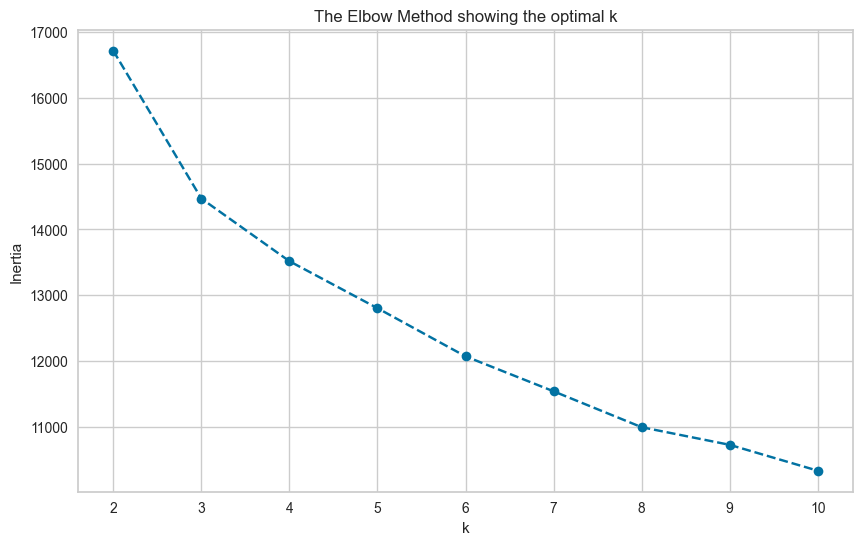

In [691]:
elbow_vis(df_scaled, k_range=range(2, 11), inertia=True)

In [692]:
from sklearn.cluster import KMeans

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k,
                   random_state=42)
    model.fit(component_df)
    ssd.append(model.inertia_)

In [693]:
-pd.Series(ssd).diff()

0        NaN
1   2,204.89
2     752.01
3     900.56
4     542.01
5     294.26
6     232.96
7     292.00
dtype: float64

### distortion

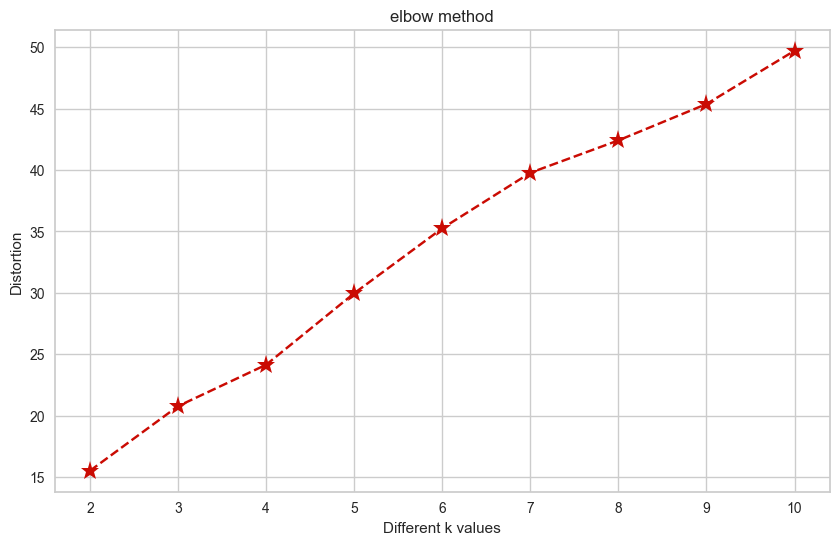

In [694]:
elbow_vis(df_scaled, k_range=range(2, 11), inertia=False)

### silhoutte score

In [695]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.29931592812494856
For n_clusters=3, the silhouette score is 0.25010163145103254
For n_clusters=4, the silhouette score is 0.16113854931370064
For n_clusters=5, the silhouette score is 0.13638546761109224
For n_clusters=6, the silhouette score is 0.14137891949951203
For n_clusters=7, the silhouette score is 0.14069682454467727
For n_clusters=8, the silhouette score is 0.13879141575853277
For n_clusters=9, the silhouette score is 0.13726891011037273
For n_clusters=10, the silhouette score is 0.13808752063406876


#### Apply K Means

In [696]:
model = KMeans(n_clusters=2, random_state=42)
clusters = model.fit_predict(df_scaled)
clusters

array([0, 1, 0, ..., 0, 0, 1], dtype=int32)

In [697]:
label

0       1
1       0
2       0
3       0
4       0
       ..
2207    0
2208    0
2209    0
2210    0
2211    1
Name: response, Length: 2212, dtype: int64

In [698]:
ct = pd.crosstab(label, clusters)
ct

col_0,0,1
response,,
0,784,1095
1,210,123


In [699]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(label, clusters)

0.027278607753057783

In [700]:
model = KMeans(n_clusters=3, random_state=42)
clusters = model.fit_predict(df_scaled)
clusters

array([0, 1, 0, ..., 0, 0, 1], dtype=int32)

In [701]:
df_scaled['clusters']=clusters

#### Visualizing and Labeling All the Clusters

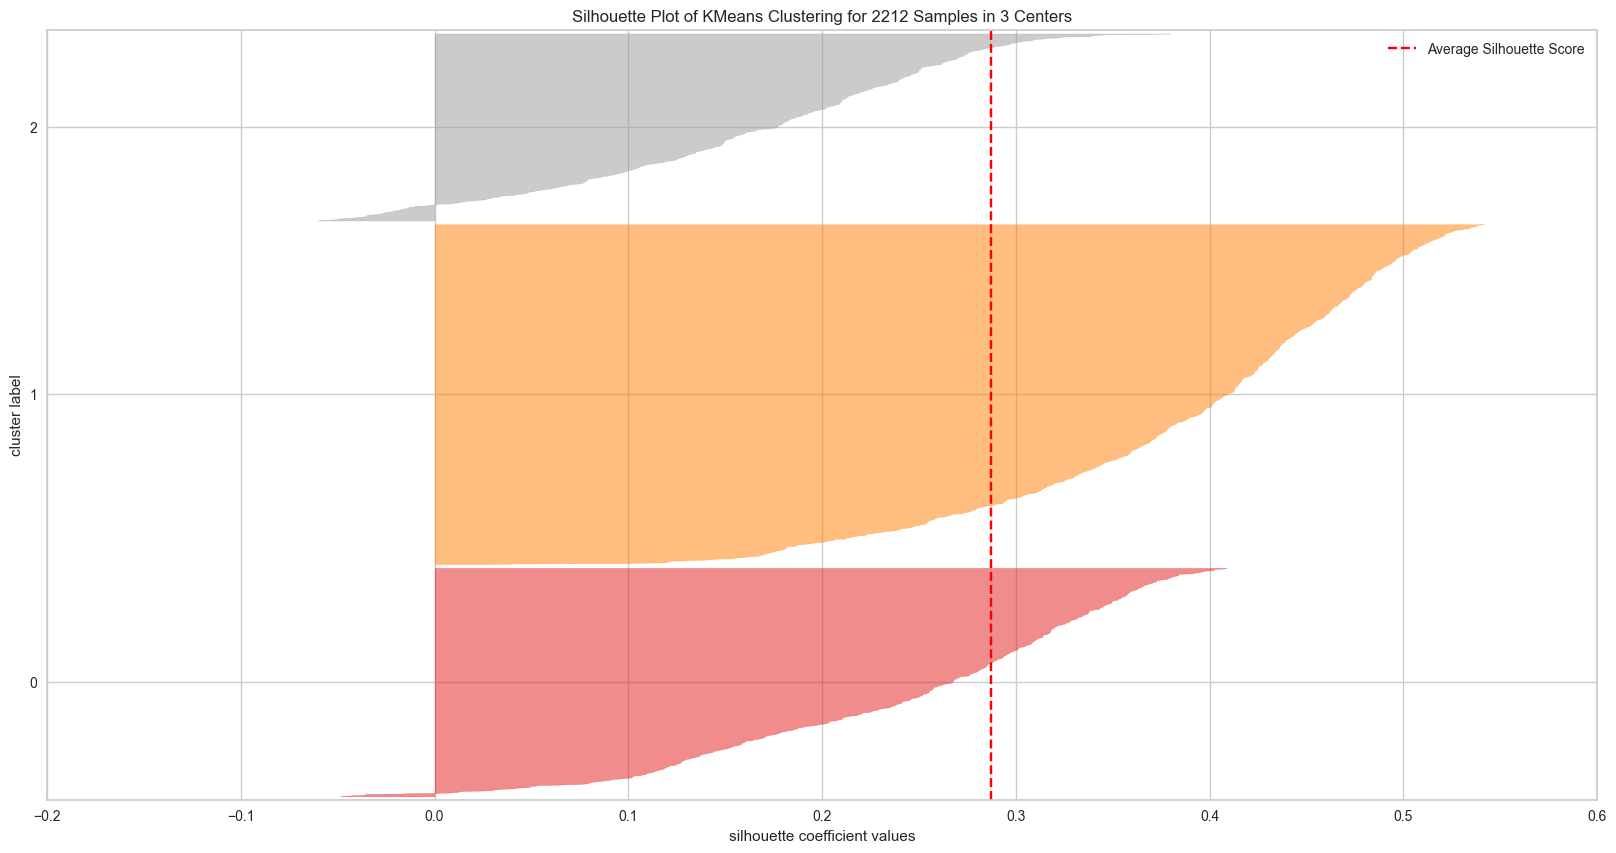

In [702]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=3,
                random_state=42)          # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df_scaled)    # Fit the data to the visualizer
visualizer.poof();

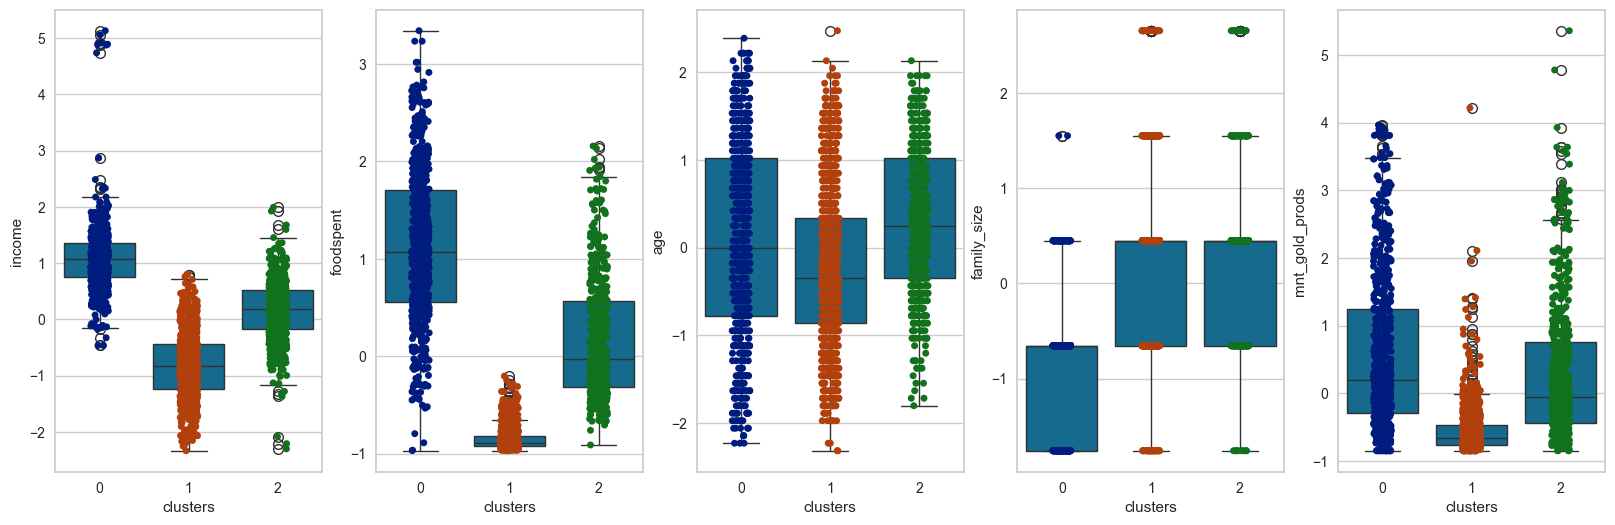

In [703]:
plt.figure(figsize = (20,6))

plt.subplot(151)
sns.boxplot(y="income", x="clusters", data=df_scaled)
sns.stripplot(y="income", x="clusters", data=df_scaled, palette="dark")

plt.subplot(152)
sns.boxplot(y="foodspent", x="clusters", data=df_scaled)
sns.stripplot(y="foodspent", x="clusters", data=df_scaled, palette="dark")

plt.subplot(153)
sns.boxplot(y="age", x="clusters", data=df_scaled)
sns.stripplot(y="age", x="clusters", data=df_scaled, palette="dark")

plt.subplot(154)
sns.boxplot(y="family_size", x="clusters", data=df_scaled)
sns.stripplot(y="family_size", x="clusters", data=df_scaled, palette="dark")

plt.subplot(155)
sns.boxplot(y="mnt_gold_prods", x="clusters", data=df_scaled)
sns.stripplot(y="mnt_gold_prods", x="clusters", data=df_scaled, palette="dark");

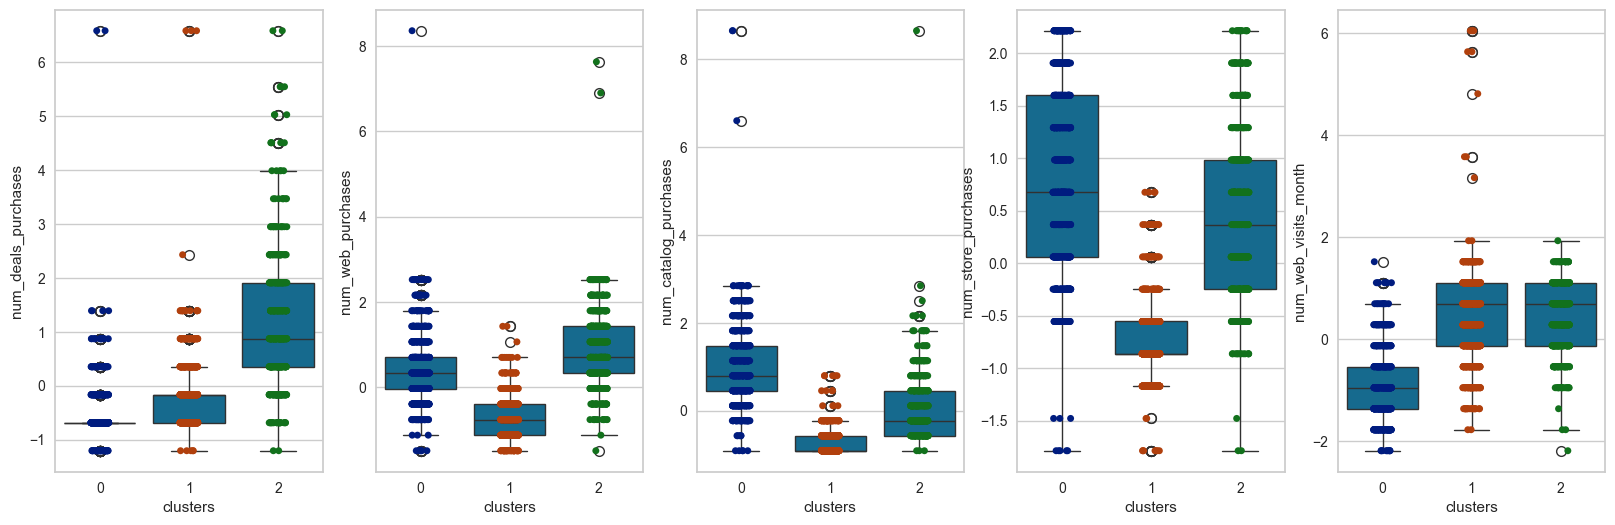

In [704]:
plt.figure(figsize = (20,6))

plt.subplot(151)
sns.boxplot(y='num_deals_purchases', x="clusters", data=df_scaled)
sns.stripplot(y='num_deals_purchases', x="clusters", data=df_scaled, palette="dark")

plt.subplot(152)
sns.boxplot(y='num_web_purchases', x="clusters", data=df_scaled)
sns.stripplot(y='num_web_purchases', x="clusters", data=df_scaled, palette="dark")

plt.subplot(153)
sns.boxplot(y='num_catalog_purchases', x="clusters", data=df_scaled)
sns.stripplot(y='num_catalog_purchases', x="clusters", data=df_scaled, palette="dark")

plt.subplot(154)
sns.boxplot(y='num_store_purchases', x="clusters", data=df_scaled)
sns.stripplot(y='num_store_purchases', x="clusters", data=df_scaled, palette="dark")

plt.subplot(155)
sns.boxplot(y='num_web_visits_month', x="clusters", data=df_scaled)
sns.stripplot(y='num_web_visits_month', x="clusters", data=df_scaled, palette="dark");

In [705]:
cluspred = df_scaled.groupby("clusters").mean().T
cluspred

clusters,0,1,2
income,1.09,-0.82,0.16
mnt_gold_prods,0.59,-0.56,0.30
num_deals_purchases,-0.52,-0.21,1.02
num_web_purchases,0.37,-0.75,0.91
num_catalog_purchases,1.04,-0.73,0.05
num_store_purchases,0.81,-0.80,0.47
num_web_visits_month,-1.02,0.45,0.43
loyalty,-0.09,-0.21,0.49
age,0.10,-0.23,0.30
family_size,-0.77,0.30,0.40


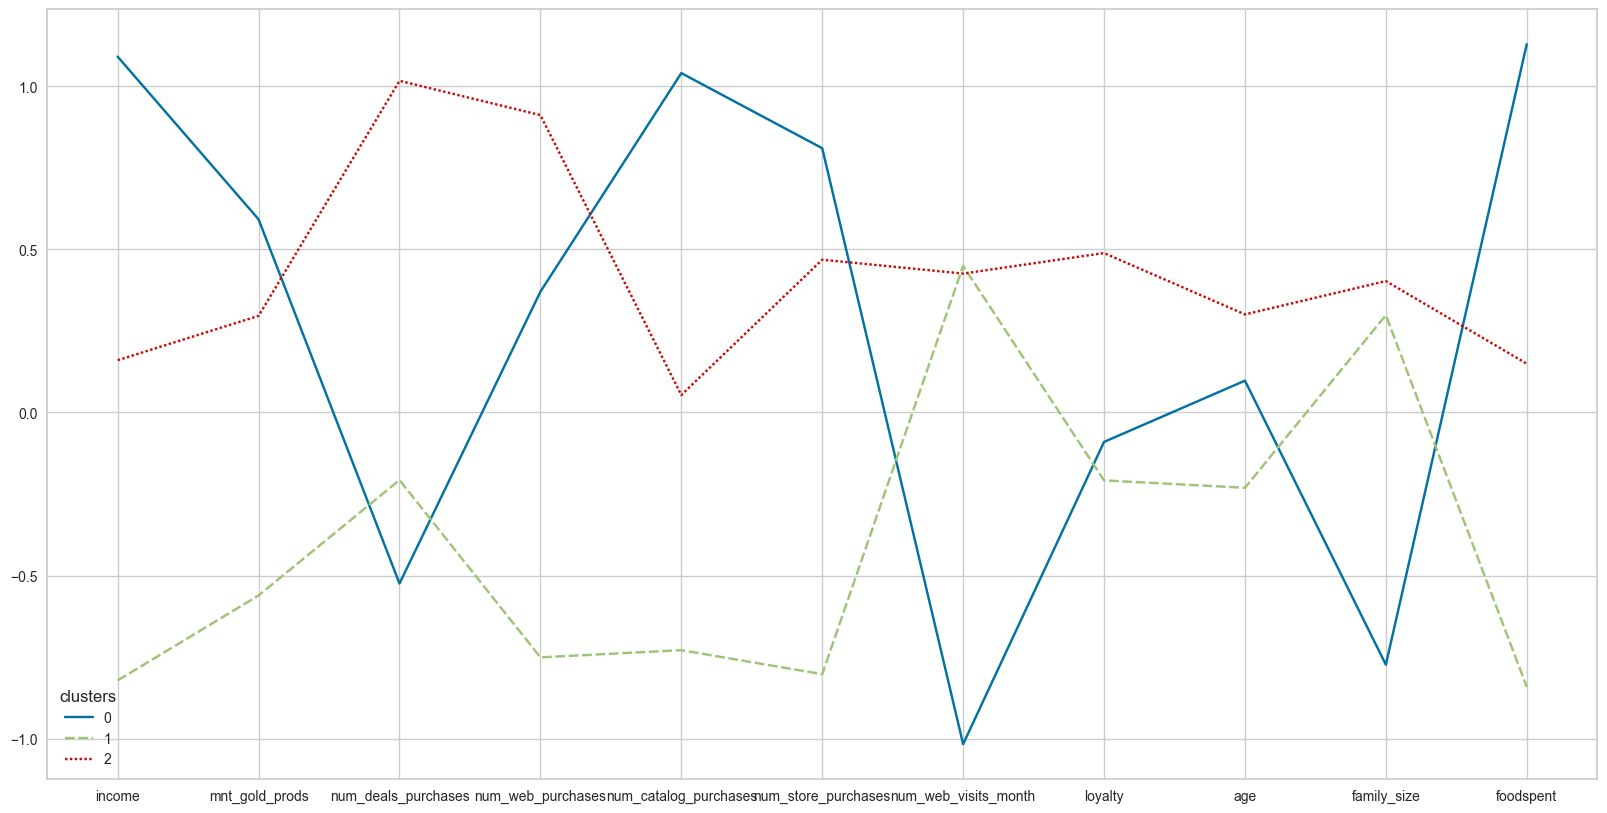

In [706]:
sns.lineplot(data=cluspred);

### Clustering based on selected features

#### Select features from existing data

In [707]:
df_selected = df1.loc[:, ['income', 'foodspent', 'num_catalog_purchases']]
df_selected

,income,foodspent,num_catalog_purchases
0,58138,1529,10
1,46344,21,1
2,71613,734,2
3,26646,48,0
4,58293,407,3
...,...,...,...
2207,61223,1094,3
2208,64014,436,2
2209,56981,1217,3
2210,69245,782,5


#### Determine optimal number of clusters for selected features

In [708]:
scaler = StandardScaler()
df_ss = scaler.fit_transform(df_selected)

In [709]:
df_ss = pd.DataFrame(df_ss, columns=df_selected.columns)
df_ss.head()

,income,foodspent,num_catalog_purchases
0,0.29,1.67,2.50
1,-0.26,-0.94,-0.57
2,0.91,0.30,-0.23
3,-1.18,-0.89,-0.91
4,0.29,-0.27,0.11


In [710]:
hopkins(df_ss, 1)

0.96779358474546

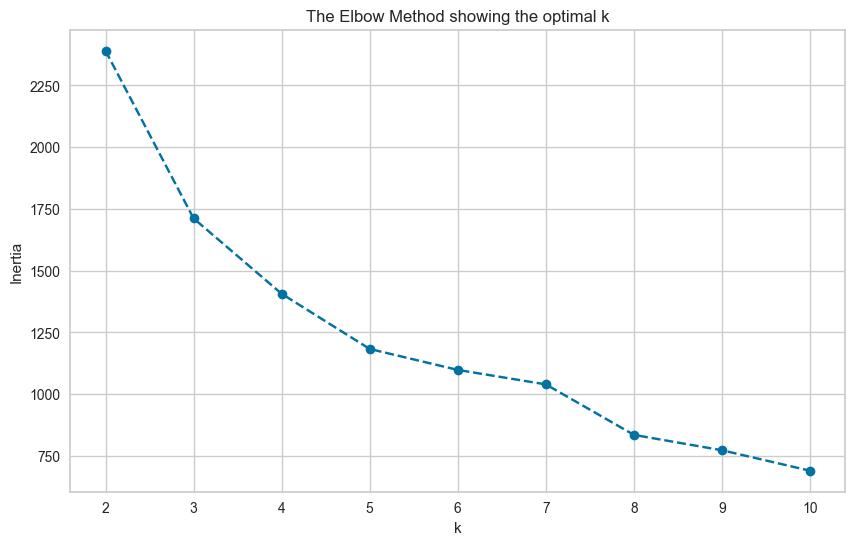

In [711]:
elbow_vis(df_ss, k_range=range(2, 11), inertia=True)

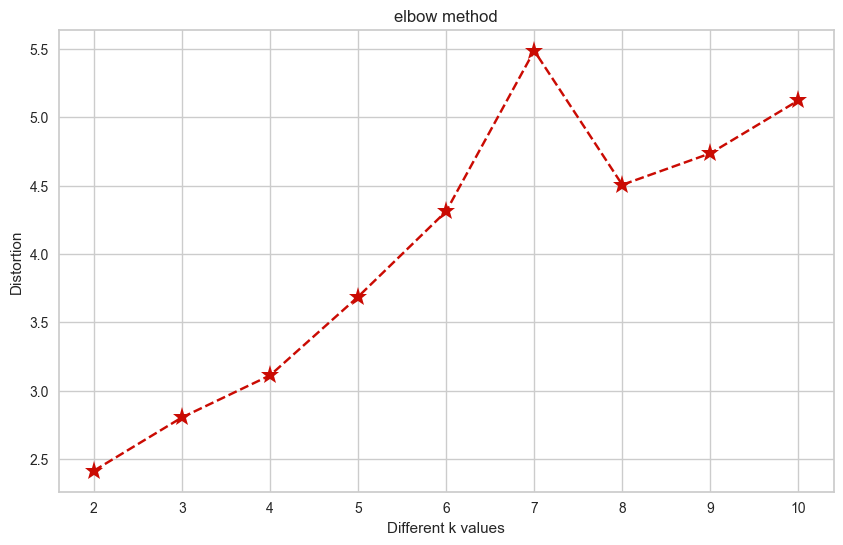

In [712]:
elbow_vis(df_ss, k_range=range(2, 11), inertia=False)

In [713]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_ss)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_ss, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5710790394336024
For n_clusters=3, the silhouette score is 0.4649507247669105
For n_clusters=4, the silhouette score is 0.3786931225638364
For n_clusters=5, the silhouette score is 0.376344528557409
For n_clusters=6, the silhouette score is 0.34254451110244066
For n_clusters=7, the silhouette score is 0.34351863175584574
For n_clusters=8, the silhouette score is 0.33803808804554175
For n_clusters=9, the silhouette score is 0.3250481138597393
For n_clusters=10, the silhouette score is 0.32781682286683256


#### Building the model based on the optimal number of clusters with selected features

In [714]:
model = KMeans(n_clusters=3, random_state=42)
clusters = model.fit_predict(df_ss)
clusters

array([2, 1, 0, ..., 0, 0, 1], dtype=int32)

In [715]:
df_ss['clusters']= clusters

In [716]:
df_ss

,income,foodspent,num_catalog_purchases,clusters
0,0.29,1.67,2.50,2
1,-0.26,-0.94,-0.57,1
2,0.91,0.30,-0.23,0
3,-1.18,-0.89,-0.91,1
4,0.29,-0.27,0.11,0
...,...,...,...,...
2207,0.43,0.92,0.11,0
2208,0.56,-0.22,-0.23,0
2209,0.23,1.13,0.11,0
2210,0.80,0.38,0.80,0


<Figure size 2000x1000 with 0 Axes>

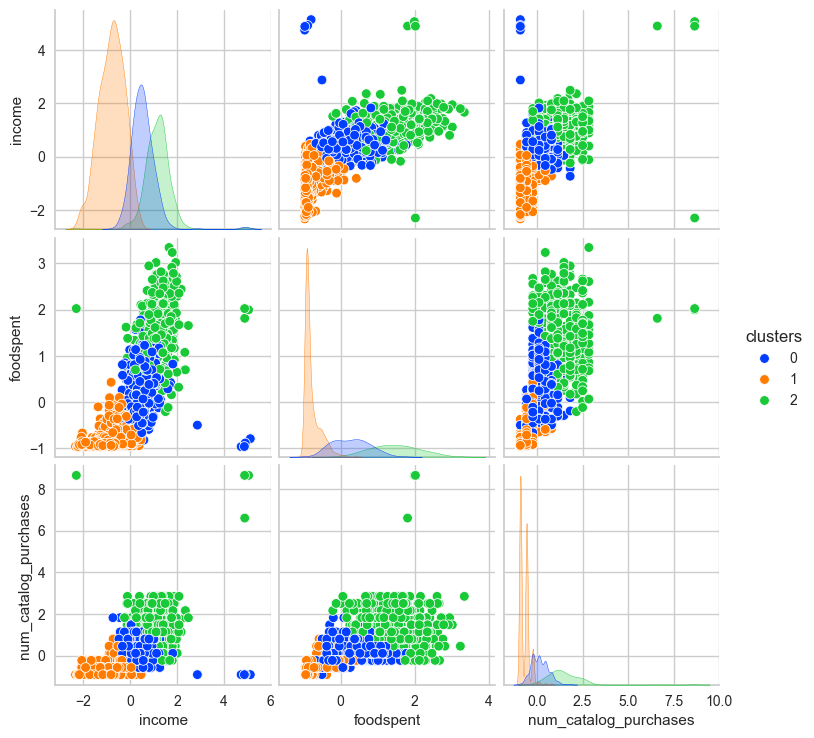

In [717]:
plt.figure(figsize = (20,10))
sns.pairplot(data=df_ss, hue="clusters", palette="bright");

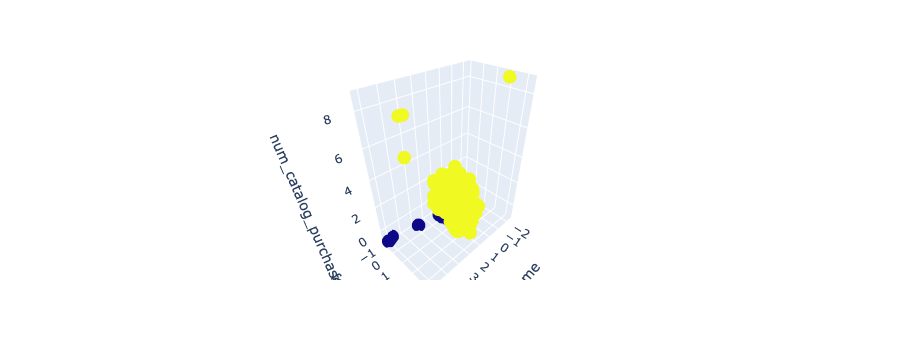

In [718]:
import plotly.express as px
fig = px.scatter_3d(df_ss,
                    x='income',
                    y='foodspent',
                    z='num_catalog_purchases',
                    color='clusters'
                   )
fig.update_coloraxes(showscale=False)
fig.show();

#### We have made our inferences on the Kmeans algorithm so far, and we will take and compare the results with another clustering algorithm, Hierarchical Clustering:


### The point we need to pay attention to is the number of clusters in kmeans so that we can find the differences.

## Hierarchical Clustering

### Determine optimal number of clusters using Dendogram

In [719]:
df_scaled=df_scaled.drop(columns=['clusters'])

In [720]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [721]:
hc_ward = linkage(y=df_scaled, method="ward")
hc_complete = linkage(df_scaled, "complete")
hc_average = linkage(df_scaled, "average")
hc_single = linkage(df_scaled, "single")

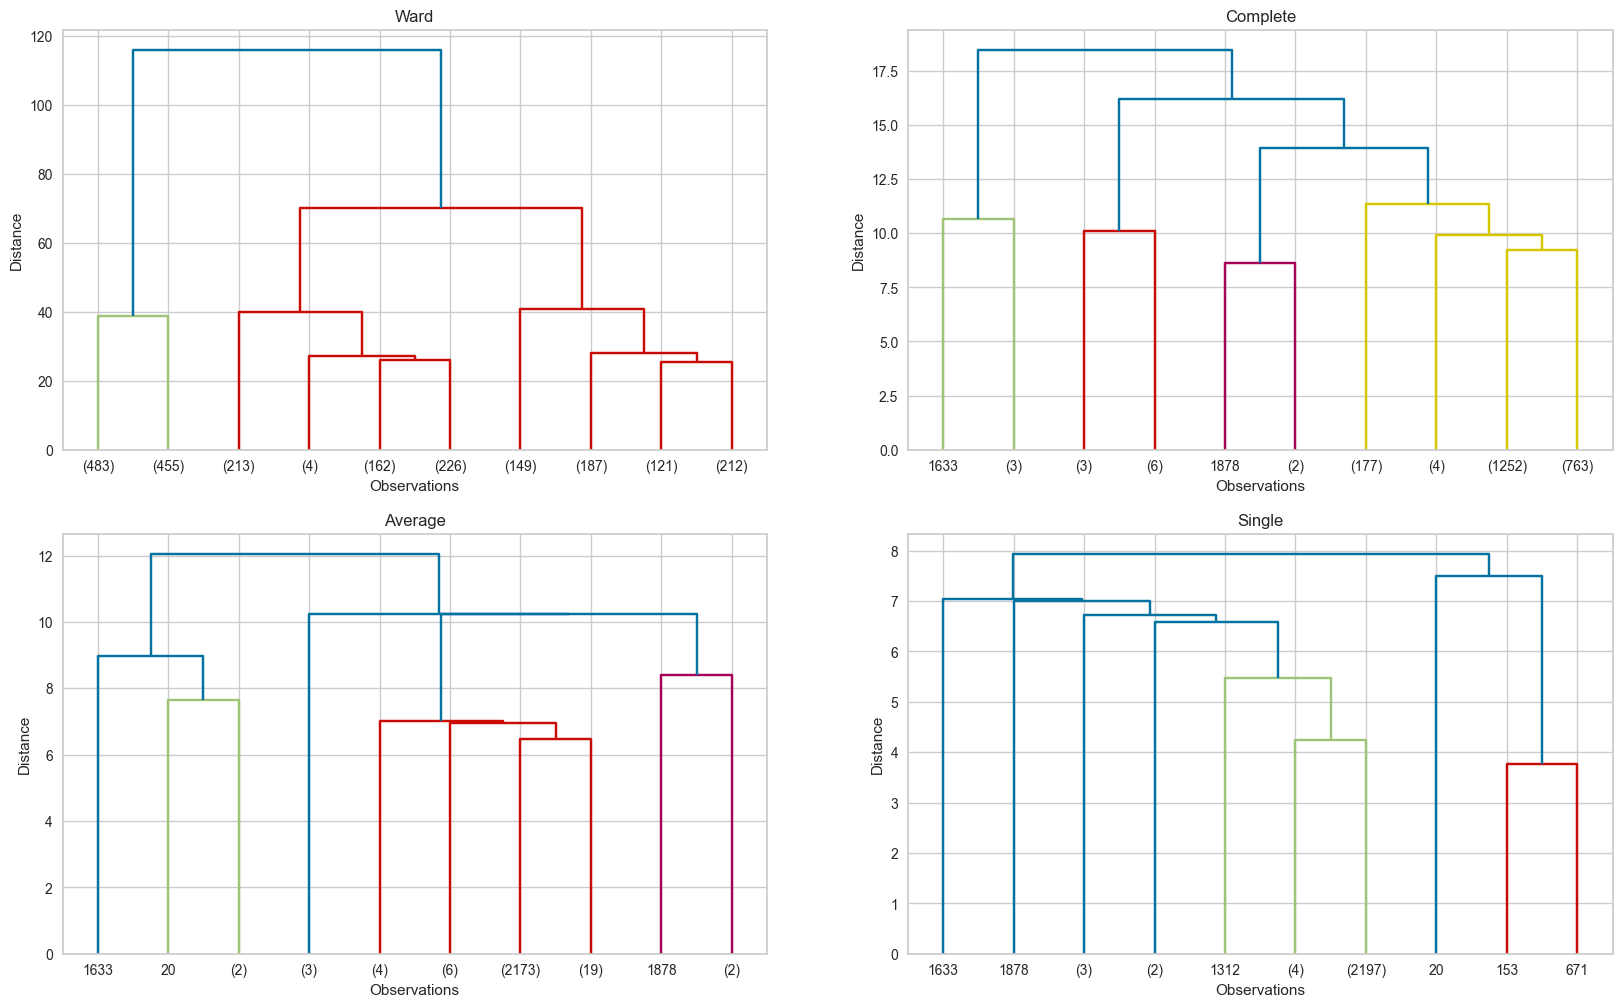

In [722]:
plt.figure(figsize=(20,12))
plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)
plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)
plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)
plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10);

In [723]:
from sklearn.cluster import AgglomerativeClustering

### silhouette_score

In [724]:
from sklearn.metrics import silhouette_score

In [725]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(df_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.2534188234912263
Silhouette Score for 3 clusters: 0.21290571390878482
Silhouette Score for 4 clusters: 0.19453079792200348
Silhouette Score for 5 clusters: 0.19859634966171805
Silhouette Score for 6 clusters: 0.1200177993313527
Silhouette Score for 7 clusters: 0.10700303420963503
Silhouette Score for 8 clusters: 0.10980521850719092
Silhouette Score for 9 clusters: 0.10358551563889001


In [726]:
model = AgglomerativeClustering(n_clusters=3,
                                metric="euclidean",
                                linkage="ward")
clusters = model.fit_predict(df_scaled)

In [727]:
df_scaled["clusters"] = clusters
df_scaled.head()

,income,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,loyalty,age,family_size,foodspent,clusters
0,0.29,0.85,0.35,1.43,2.50,-0.56,0.69,1.53,1.02,-1.76,1.67,2
1,-0.26,-0.73,-0.17,-1.13,-0.57,-1.17,-0.13,-1.19,1.27,0.45,-0.94,1
2,0.91,-0.04,-0.69,1.43,-0.23,1.29,-0.54,-0.21,0.33,-0.65,0.30,0
3,-1.18,-0.75,-0.17,-0.76,-0.91,-0.56,0.28,-1.06,-1.29,0.45,-0.89,1
4,0.29,-0.56,1.39,0.33,0.11,0.06,-0.13,-0.95,-1.03,0.45,-0.27,0


In [728]:
clus_pred = df_scaled.groupby("clusters").mean().T
clus_pred

clusters,0,1,2
income,0.25,-0.86,1.05
mnt_gold_prods,-0.02,-0.58,0.91
num_deals_purchases,0.71,-0.23,-0.44
num_web_purchases,0.66,-0.78,0.49
num_catalog_purchases,0.05,-0.75,1.10
num_store_purchases,0.50,-0.84,0.74
num_web_visits_month,0.20,0.46,-0.94
loyalty,0.23,-0.19,0.04
age,0.23,-0.24,0.11
family_size,0.29,0.31,-0.80


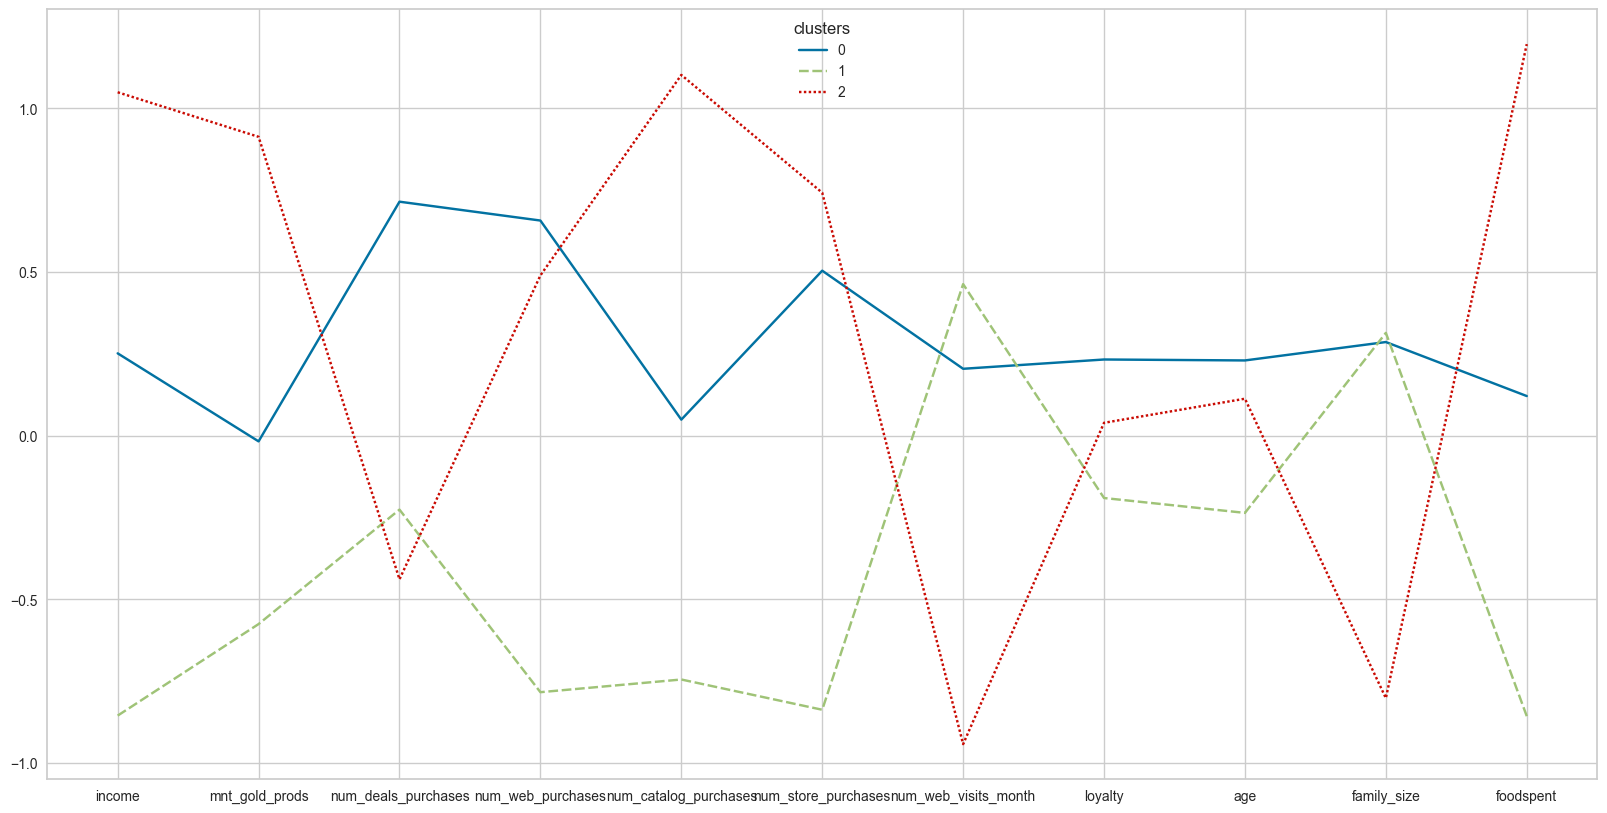

In [729]:
sns.lineplot(data=clus_pred);

In [730]:
df_scaled.clusters.value_counts()

clusters
1    938
0    669
2    605
Name: count, dtype: int64

### Clustering based on selected features

In [731]:
dfss = df_scaled.iloc[:, [0, 4, 10]]
dfss.head()

,income,num_catalog_purchases,foodspent
0,0.29,2.50,1.67
1,-0.26,-0.57,-0.94
2,0.91,-0.23,0.30
3,-1.18,-0.91,-0.89
4,0.29,0.11,-0.27


In [732]:
hopkins(dfss, 1)

0.9677535816181734

In [733]:
hc_ward = linkage(y=dfss, method="ward")
hc_complete = linkage(dfss, "complete")
hc_average = linkage(dfss, "average")
hc_single = linkage(dfss, "single")

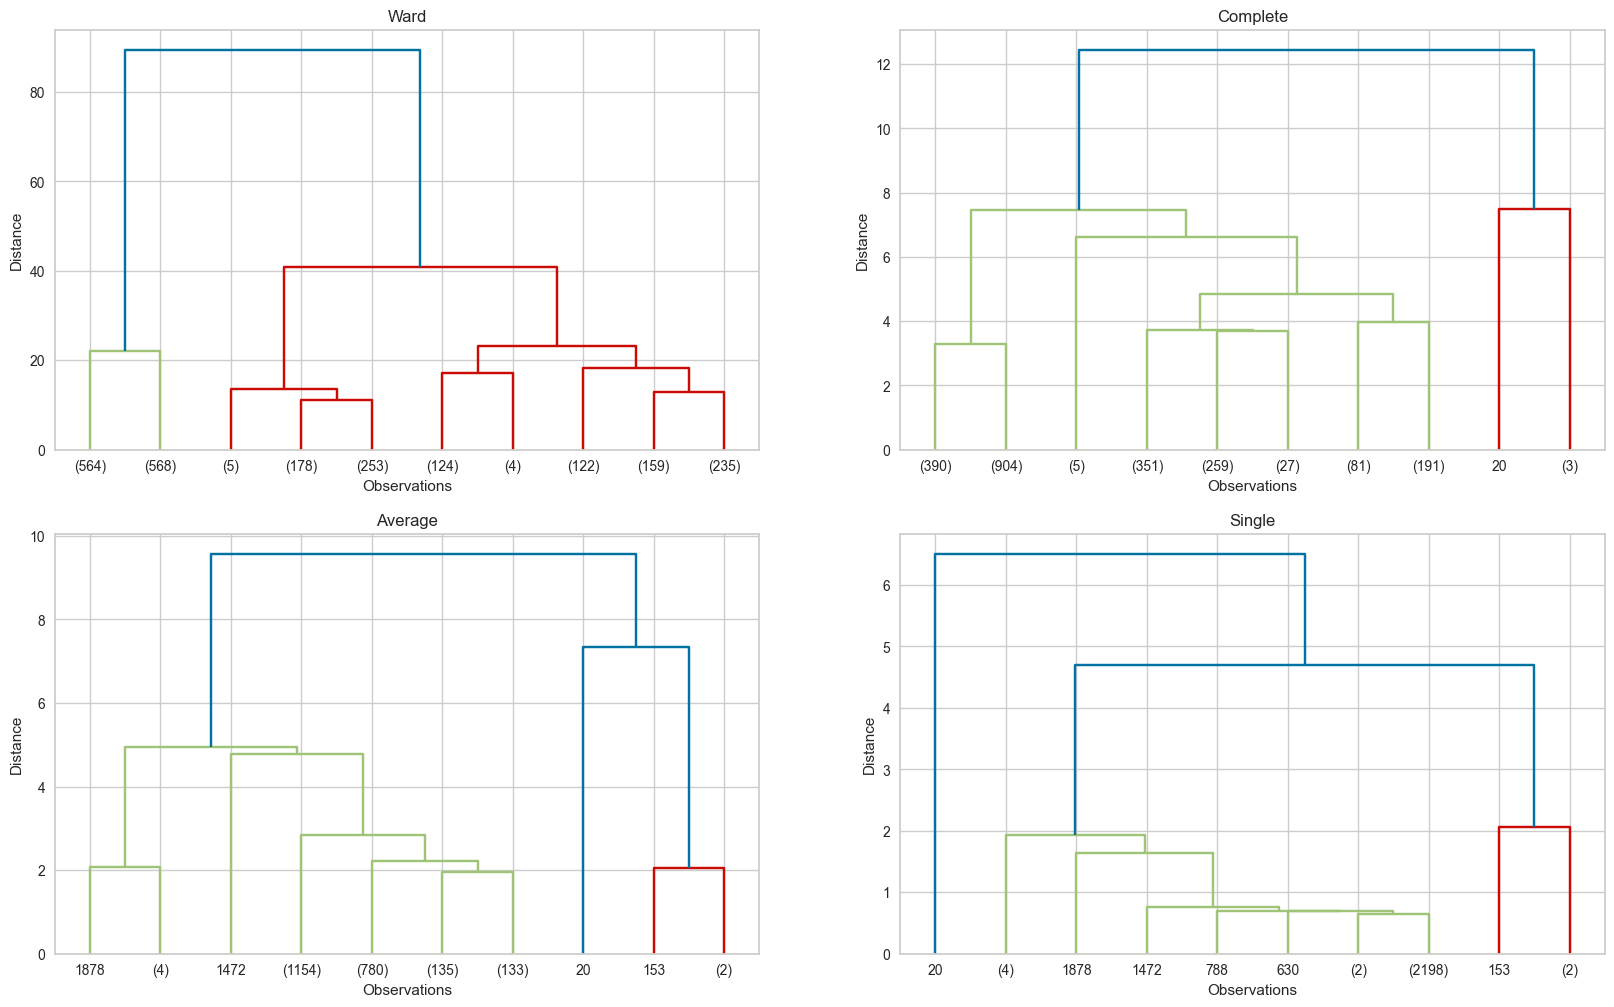

In [734]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode="lastp", p=10, leaf_font_size=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode="lastp", p=10, leaf_font_size=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode="lastp", p=10, leaf_font_size=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode="lastp", p=10, leaf_font_size=10);

In [736]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(dfss)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(dfss, model.labels_)}')

Silhouette Score for 2 clusters: 0.5291171524875263
Silhouette Score for 3 clusters: 0.4265474423618357
Silhouette Score for 4 clusters: 0.4156060093290148
Silhouette Score for 5 clusters: 0.3334489561402527
Silhouette Score for 6 clusters: 0.3278865737451963
Silhouette Score for 7 clusters: 0.33021500422011574
Silhouette Score for 8 clusters: 0.3350489310614173
Silhouette Score for 9 clusters: 0.32857247959844926
Silhouette Score for 10 clusters: 0.3083413875573943


In [737]:
model_last = AgglomerativeClustering(n_clusters=3,
                                      metric="euclidean",
                                      linkage="ward")
clusters = model_last.fit_predict(dfss)
dfss["clusters"] = clusters
dfss.head()

,income,num_catalog_purchases,foodspent,clusters
0,0.29,2.50,1.67,0
1,-0.26,-0.57,-0.94,1
2,0.91,-0.23,0.30,2
3,-1.18,-0.91,-0.89,1
4,0.29,0.11,-0.27,2


In [738]:
dfss.clusters.value_counts()

clusters
1    1132
0     644
2     436
Name: count, dtype: int64

<Figure size 2000x1000 with 0 Axes>

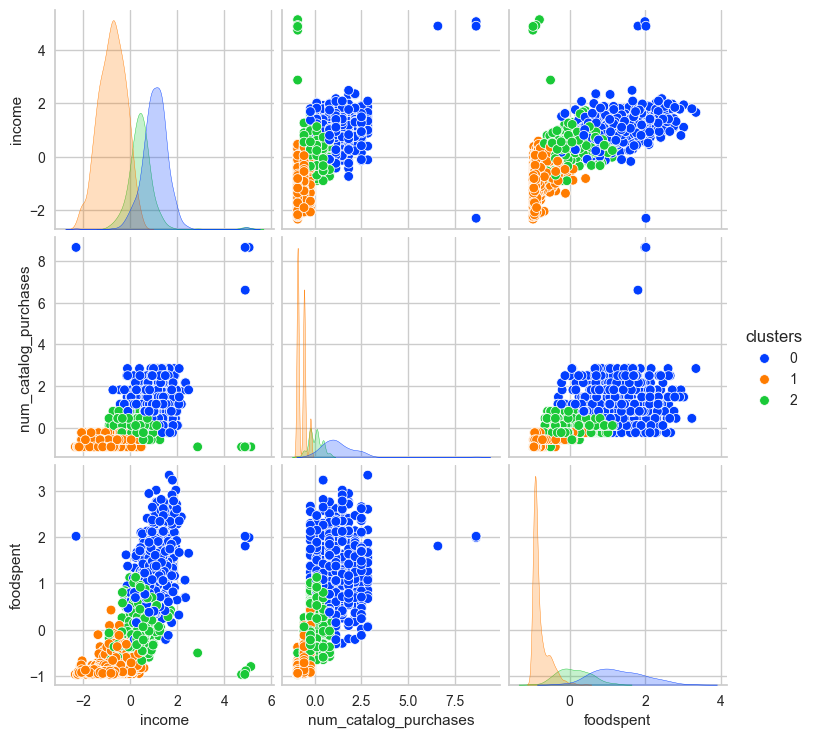

In [739]:
plt.figure(figsize=(20,10))
sns.pairplot(data=dfss, hue="clusters", palette="bright");

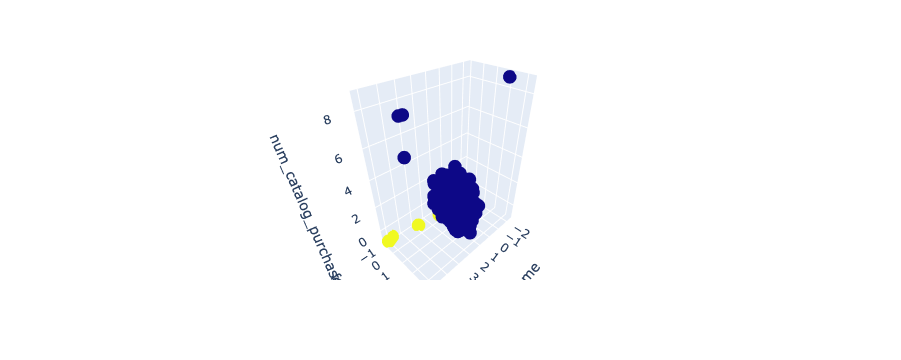

In [740]:
fig = px.scatter_3d(dfss,
                    x='income',
                    y='foodspent',
                    z='num_catalog_purchases',
                    color='clusters')
fig.update_coloraxes(showscale=False)
fig.show();

## Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___